In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
## If your system supports GPU, uncomment the following:

# physical_devices = tf.config.list_physical_devices("GPU")
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Load Dateset

In [2]:
## link: http://yann.lecun.com/exdb/mnist/
# size: 11 MB
# This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(f"dtype of X_train: {X_train.dtype}")
print(f"max of X_train: {X_train.max()}")

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
dtype of X_train: uint8
max of X_train: 255


In [3]:
num_of_unique_labels = pd.Series(y_train).nunique()
print(f"Number of unique labels: {num_of_unique_labels}")
print(pd.Series(y_train).value_counts().sort_index())

Number of unique labels: 10
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64


## Plot an example of X_train

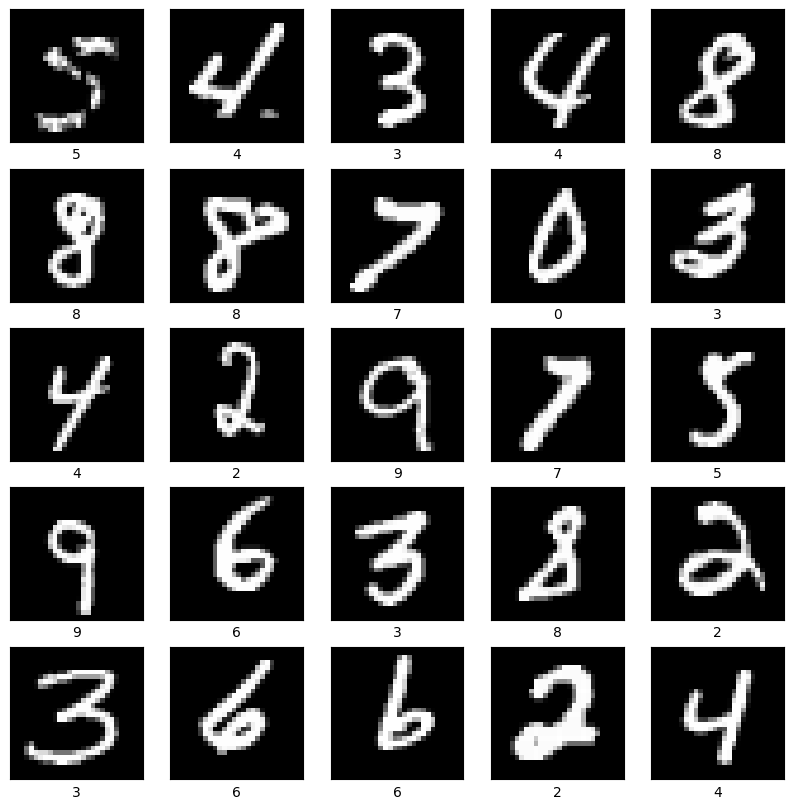

In [4]:
np.random.seed(101)
plt.figure(figsize=[10,10])
n = 0
for i in np.random.randint(0, len(X_train), size=25):
    n += 1
    plt.subplot(5, 5, n)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap="gray")
    plt.xlabel(y_train[i])

plt.show()

## Data preprocessing

In [5]:
X_train = X_train.astype("float32").reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.astype("float32").reshape(-1, 28, 28, 1) / 255.0

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train.max())

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)
1.0


## Create a simple ANN model

In [6]:
model = keras.Sequential(name="mnist_model")

model.add(keras.Input(shape=(28, 28, 1), name="input_layer"))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax', name="output_layer"))

print(model.summary())

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                       

## Compiling the model

In [7]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

## Fitting the model

In [ ]:
# history = model.fit(
#     X_train, y_train,
#     batch_size=64,
#     epochs=40,
#     validation_data=(X_test, y_test),
# )

## Save weights and history

In [ ]:
# model.save_weights("mnist_weights.h5")
# pd.DataFrame(history.history).to_csv("mnist_history.csv")

## Load pretrained data

In [8]:
model.load_weights("mnist_weights.h5")
history = pd.read_csv("mnist_history.csv")

## Evaluationg the model

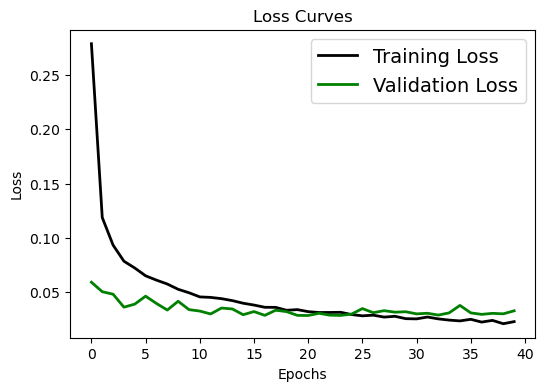

In [9]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history['loss'], 'black', linewidth=2.0)
plt.plot(history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12);

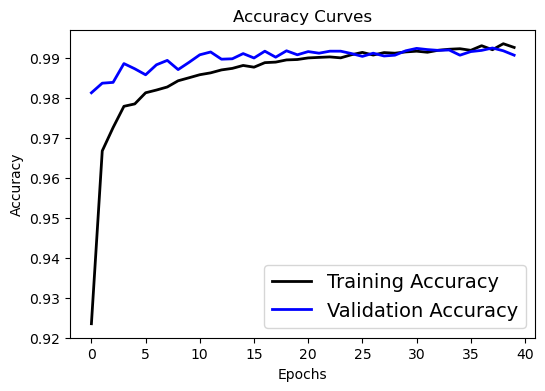

In [10]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history['accuracy'], 'black', linewidth=2.0)
plt.plot(history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12);

## Testing the model

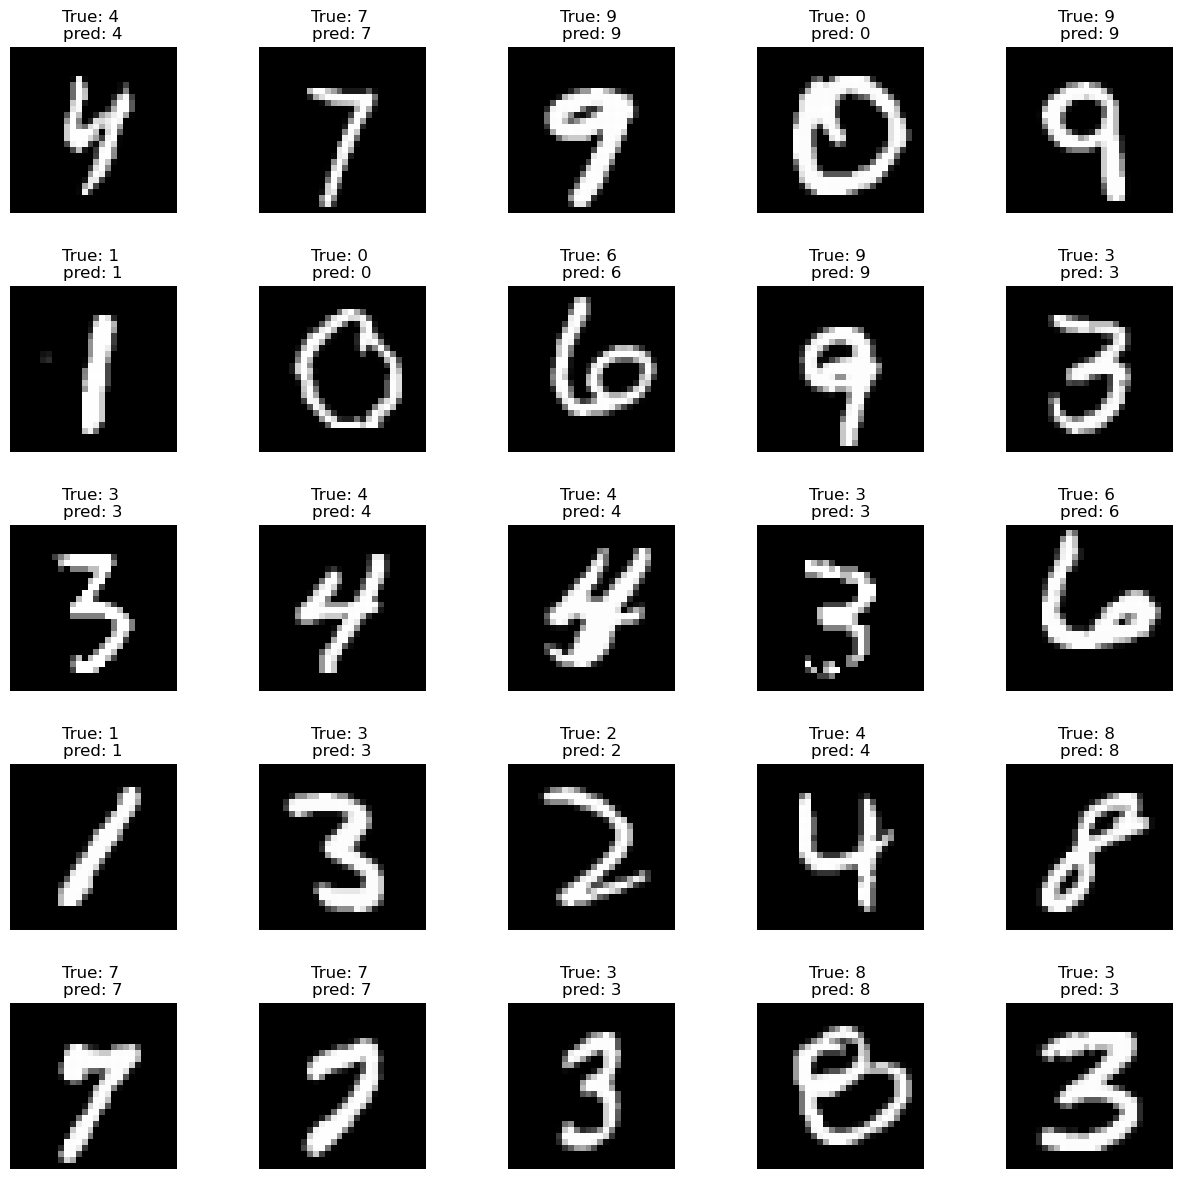

In [11]:
# Plotting the Actual vs. Predicted results
np.random.seed(101)
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()
n = 0
for i in np.random.randint(0, len(X_test), size=25):
    single_test = X_test[i].reshape(-1, 28, 28)
    y_pred = model.predict(single_test, verbose="0").argmax()
    y_true = y_test[i]
    axes[n].imshow(X_test[i], cmap="gray")
    axes[n].set_title(f"True: {y_true} \npred: {y_pred}")
    axes[n].axis('off')
    n +=1
    plt.subplots_adjust(wspace=0.5)